In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bplt
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.layouts import gridplot,row,column
from bokeh.io import output_notebook
from util.DaskProfileReader import *
from bokeh.charts import BoxPlot,Bar,Line,TimeSeries
from bokeh.models import Range1d, FixedTicker
from bokeh.models import CheckboxGroup, CustomJS
import glob
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
output_notebook()

Loading BokehJS ...

In [18]:
def profile_reader(folder,procs):
    blck_df = pd.DataFrame(columns=['Id','Time'])
    for pid in xrange(procs):
        prof = open(folder+'/profile.{}.0.0'.format(pid))
        for line in prof.readlines():
            if 'MPI_Gather' in line:
                if not 'Gatherv' in line:
                    incl_time = int(line.split()[-3])/1000
                    blck_df.loc[len(blck_df)] = [int(pid),incl_time]
    
    return blck_df
                

In [19]:
folders = glob.glob('mpi4py/24coreExecs/*_1/')
blck_df_list = list()
for folder in folders:
    print folder
    df = profile_reader(folder,int(folder.split('\\')[1].split('_')[1].split('p')[0]))
    df.sort_values('Time',ascending=False,inplace=True)
    blck_df_list.append(df)

mpi4py/24coreExecs\RMSD_120procs_1\
mpi4py/24coreExecs\RMSD_144procs_1\
mpi4py/24coreExecs\RMSD_168procs_1\
mpi4py/24coreExecs\RMSD_24procs_1\
mpi4py/24coreExecs\RMSD_48procs_1\
mpi4py/24coreExecs\RMSD_72procs_1\
mpi4py/24coreExecs\RMSD_96procs_1\


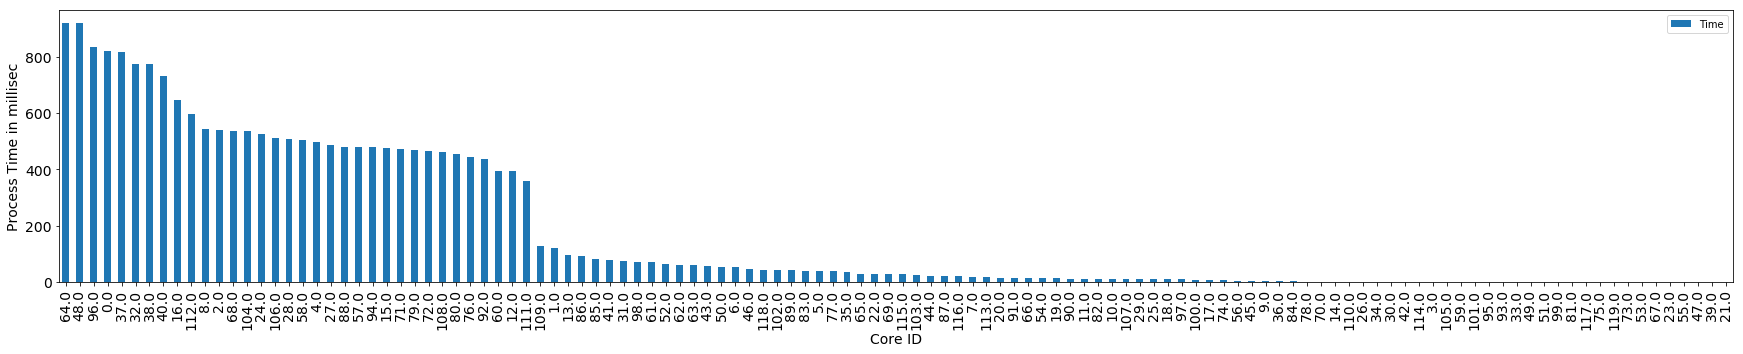

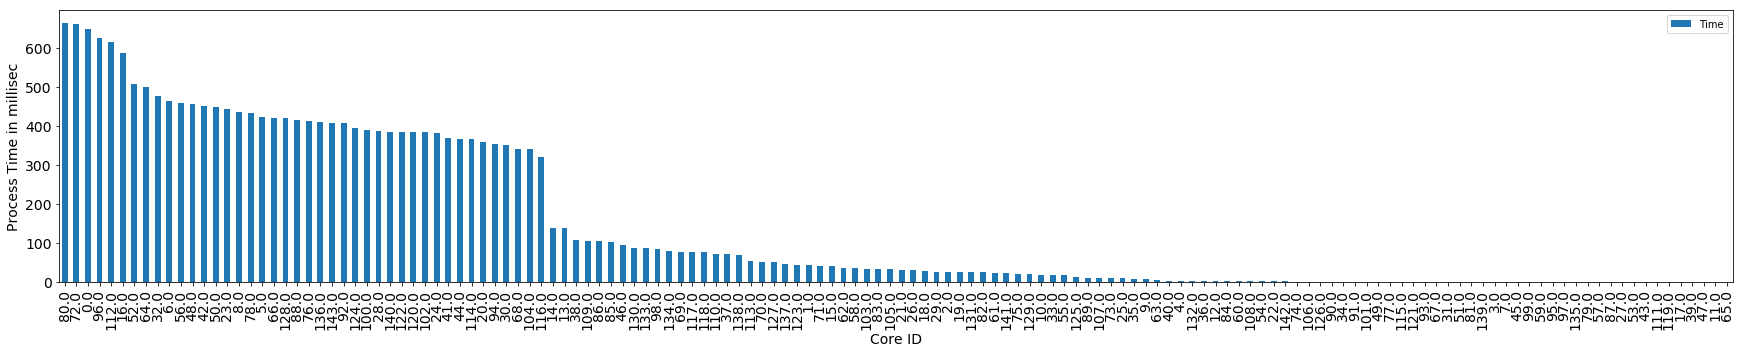

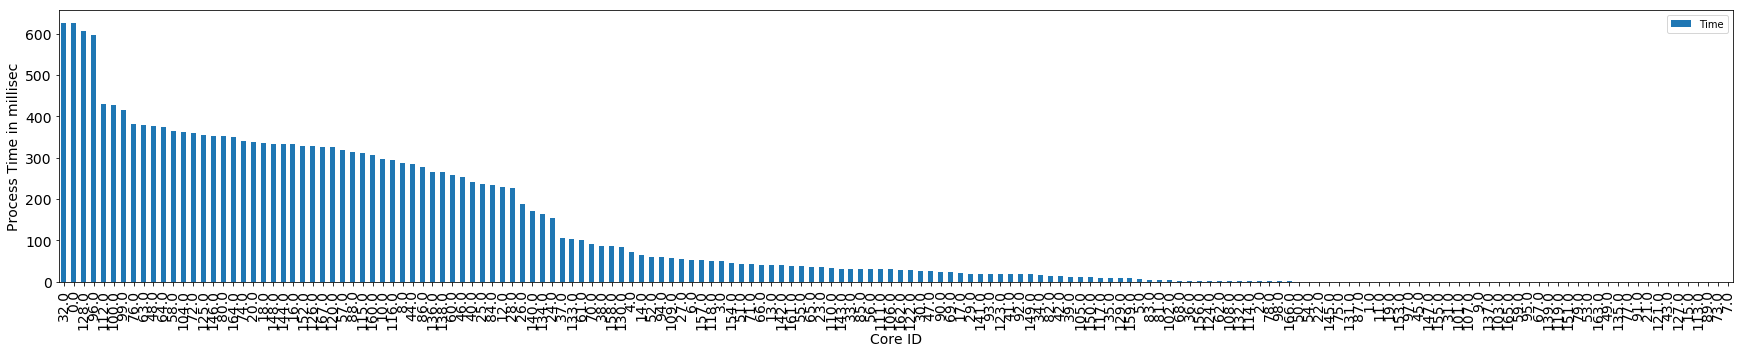

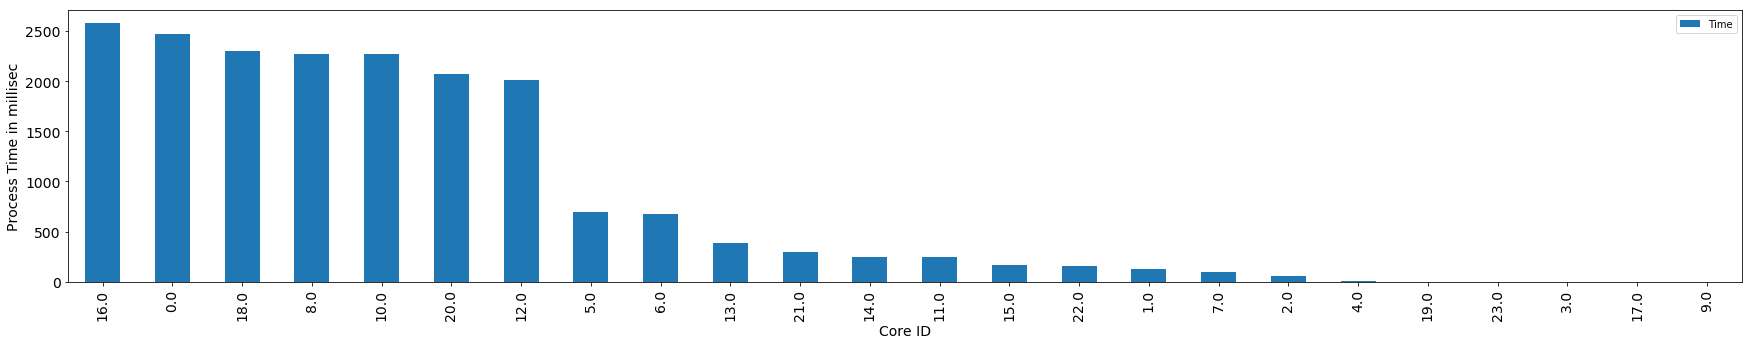

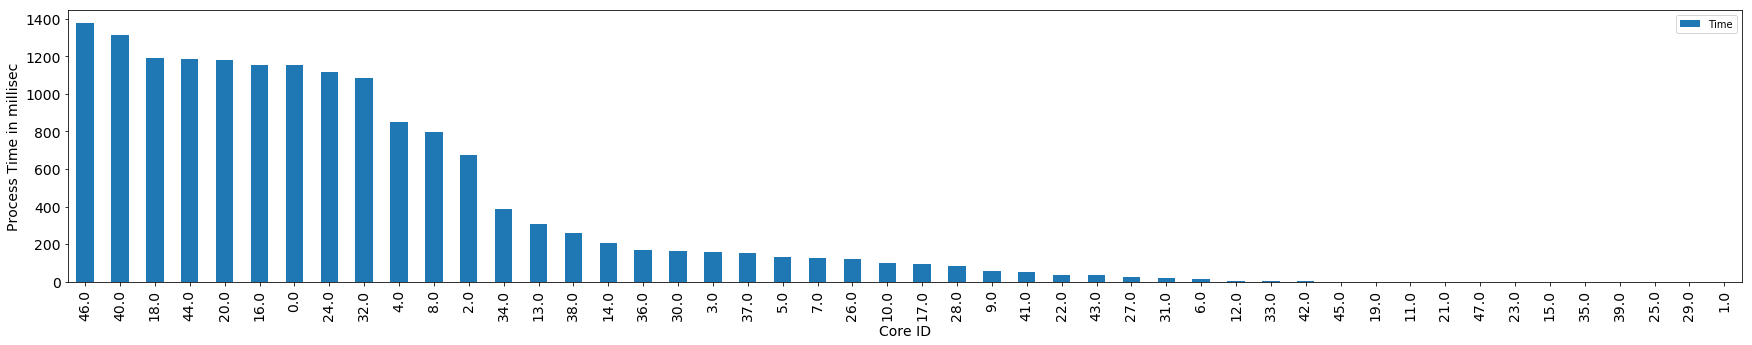

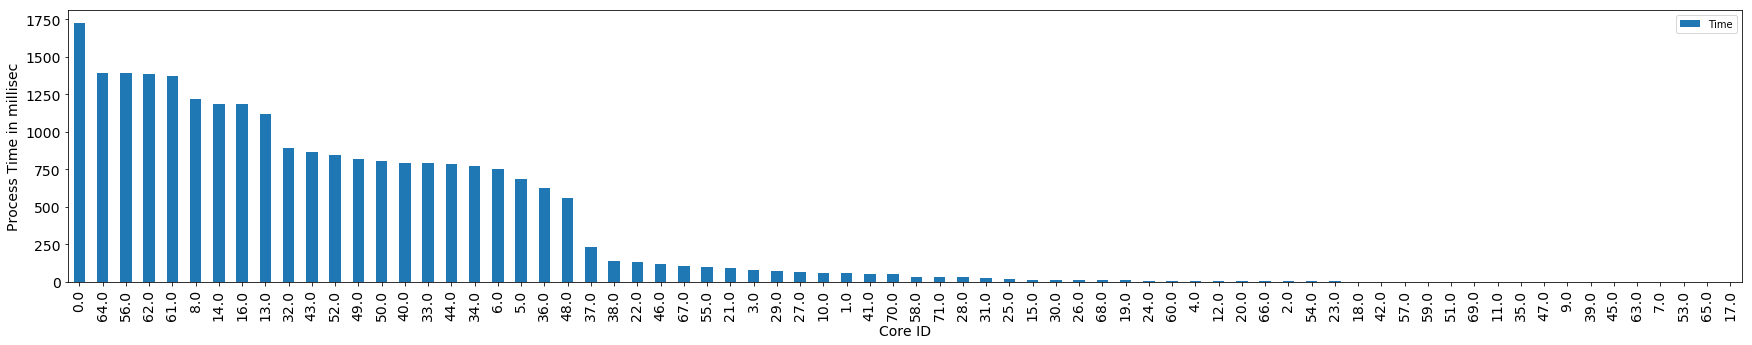

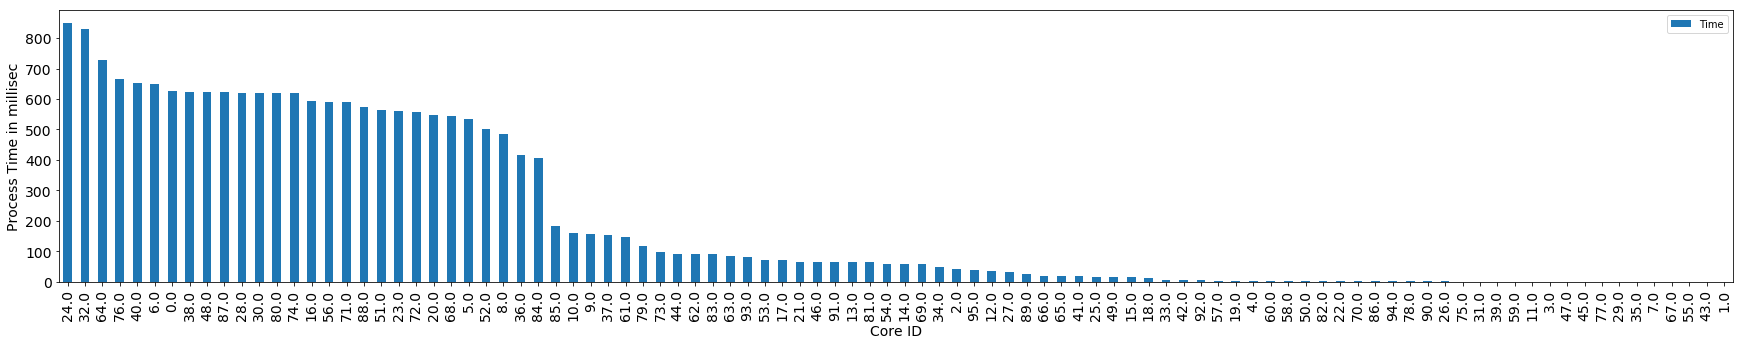

In [21]:
for df in blck_df_list:
    fig,axis = plt.subplots(nrows=1,ncols=1)
    fig.set_size_inches(30,5)
    df.plot(kind='bar',x='Id',y='Time',ax=axis,fontsize=14,stacked=True)
    axis.set_xlabel('Core ID',fontsize=14)
    axis.set_ylabel('Process Time in millisec',fontsize=14)
    #axis.set_title('Block RMSD Processes Execution Time, Total Number of MPI Procs {}'.format(len(df)),fontsize=16)
    fig.savefig('MPIgather_{}.pdf'.format(len(df)),dpi=800,bbox_inches='tight')

In [5]:
df = blck_df_list[0]
df

,Id,Time
72,36.0,1479.012
73,36.0,1278.774
6,3.0,1273.464
140,70.0,1266.609
210,105.0,1261.710
28,14.0,1244.616
52,26.0,1237.220
186,93.0,1192.529
112,56.0,1186.249
220,110.0,1163.741
